In [1]:
import pandas as pd

df = pd.read_csv("E:\8th Sem Major Project\Heart_disease_dataset\Combine.csv")

df.head()


,Name,Age,Sex,BAS1,BAS2,BAS3,BAS4,BAS5,BAS6,BAS7,...,BAS16,BAS17,BAS18,BAS19,BAR1,BAR2,BAR3,BAR4,Disease,target
0,Ahsan Habib,31,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0
1,Ibrahin Hossain,24,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Faizal Ahmed,50,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0
3,Monsar Ullah,36,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,1.0
4,Montu Mia,40,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0


In [4]:
print(df.columns.tolist())


['Age', 'Sex', ' BAS1', ' BAS2', ' BAS3', ' BAS4', ' BAS5', ' BAS6', ' BAS7', ' BAS8', ' BAS9', ' BAS10', ' BAS11', ' BAS12', ' BAS13', ' BAS14', ' BAS15', 'BAS16', 'BAS17', 'BAS18', 'BAS19', ' BAR1', ' BAR2', ' BAR3', ' BAR4', 'target']


In [5]:
# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']               # target column

# Check the shapes
print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

X.head()


Feature Shape: (392, 25)
Target Shape: (392,)


,Age,Sex,BAS1,BAS2,BAS3,BAS4,BAS5,BAS6,BAS7,BAS8,...,BAS14,BAS15,BAS16,BAS17,BAS18,BAS19,BAR1,BAR2,BAR3,BAR4
0,31,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


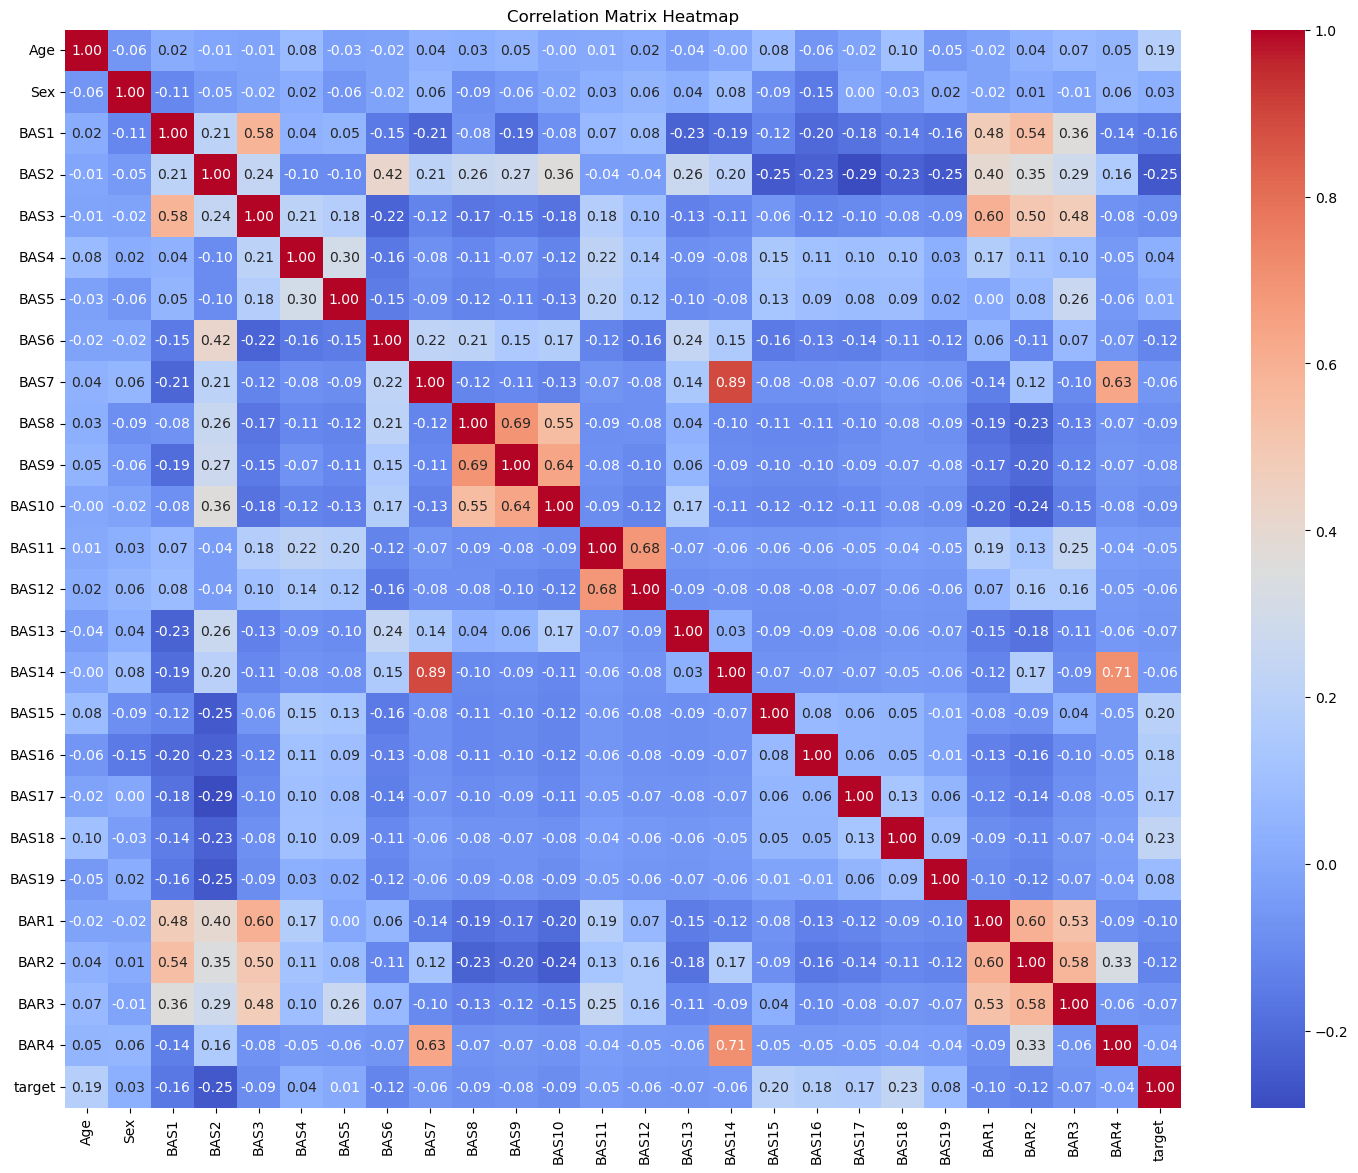

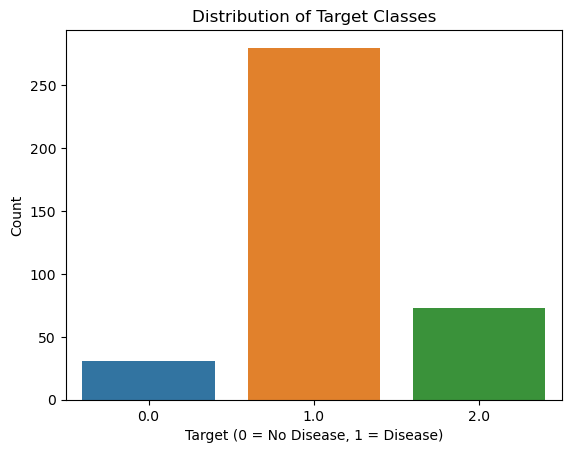

target
1.0    280
2.0     73
0.0     31
Name: count, dtype: int64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix
plt.figure(figsize=(18, 14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 2. Class Distribution
sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

# Also print how many 0 and 1
print(y.value_counts())


In [8]:
print(y.isnull().sum())

8


In [9]:
# Drop rows where target is NaN
df = df.dropna(subset=['target'])

X = df.drop('target', axis=1)
y = df['target']

print("New Shape after dropping NaN:", X.shape, y.shape)


New Shape after dropping NaN: (384, 25) (384,)


In [10]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (307, 25)
Test Shape: (77, 25)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Random Forest
rf = RandomForestClassifier(random_state=42)

# Hyperparameter 
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit on training data
random_search.fit(X_train, y_train)

# Best estimator
best_rf = random_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 0.922077922077922

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.17      0.25         6
         1.0       1.00      1.00      1.00        56
         2.0       0.74      0.93      0.82        15

    accuracy                           0.92        77
   macro avg       0.75      0.70      0.69        77
weighted avg       0.91      0.92      0.91        77


Confusion Matrix:
 [[ 1  0  5]
 [ 0 56  0]
 [ 1  0 14]]


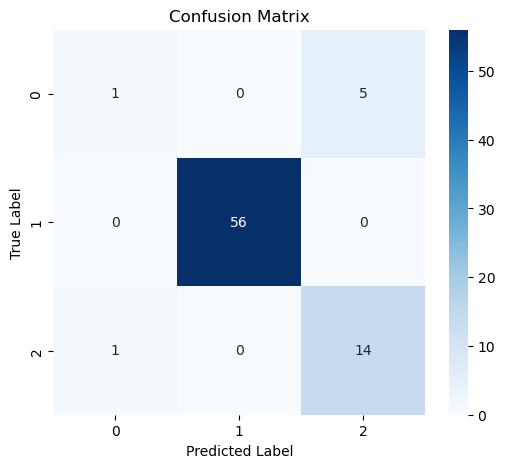

In [12]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9090909090909091

Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.17      0.22         6
         1.0       1.00      1.00      1.00        56
         2.0       0.72      0.87      0.79        15

    accuracy                           0.91        77
   macro avg       0.69      0.68      0.67        77
weighted avg       0.89      0.91      0.90        77


Confusion Matrix:
 [[ 1  0  5]
 [ 0 56  0]
 [ 2  0 13]]


In [14]:
import pandas as pd

# Create a comparison DataFrame
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy (%)': [round(accuracy_score(y_test, y_pred)*100, 2), round(accuracy_score(y_test, y_pred_logreg)*100, 2)]
})

# Show the table
print(results)

                 Model  Accuracy (%)
0        Random Forest         92.21
1  Logistic Regression         90.91


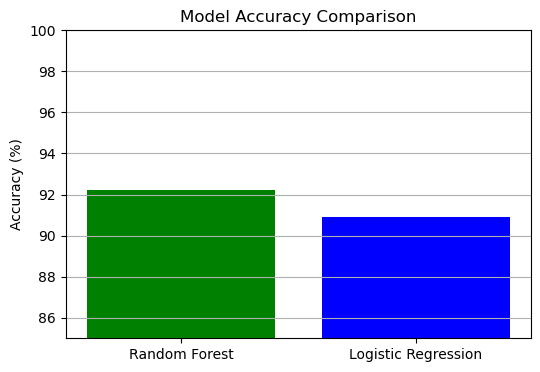

In [15]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(results['Model'], results['Accuracy (%)'], color=['green', 'blue'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(85, 100)
plt.grid(axis='y')
plt.show()

In [16]:
from sklearn.svm import SVC

# Define SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.73      1.00      0.84        56
         2.0       0.00      0.00      0.00        15

    accuracy                           0.73        77
   macro avg       0.24      0.33      0.28        77
weighted avg       0.53      0.73      0.61        77


Confusion Matrix:
 [[ 0  6  0]
 [ 0 56  0]
 [ 0 15  0]]


C:\Users\raman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # 5 neighbors 

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.8051948051948052

Classification Report:
               precision    recall  f1-score   support

         0.0       0.40      0.33      0.36         6
         1.0       0.93      0.93      0.93        56
         2.0       0.50      0.53      0.52        15

    accuracy                           0.81        77
   macro avg       0.61      0.60      0.60        77
weighted avg       0.80      0.81      0.80        77


Confusion Matrix:
 [[ 2  0  4]
 [ 0 52  4]
 [ 3  4  8]]


In [18]:
!pip install imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE class distribution:\n", y_train_smote.value_counts())
print("New shape after SMOTE:", X_train_smote.shape, y_train_smote.shape)

After SMOTE class distribution:
 target
1.0    224
2.0    224
0.0    224
Name: count, dtype: int64
New shape after SMOTE: (672, 25) (672,)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Retrain Random Forest on SMOTEd training data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on the original X_test
y_pred_rf_smote = rf_smote.predict(X_test)

# Evaluate
print("Random Forest after SMOTE - Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))

Random Forest after SMOTE - Accuracy: 0.8961038961038961

Classification Report:
               precision    recall  f1-score   support

         0.0       0.40      0.67      0.50         6
         1.0       1.00      1.00      1.00        56
         2.0       0.82      0.60      0.69        15

    accuracy                           0.90        77
   macro avg       0.74      0.76      0.73        77
weighted avg       0.92      0.90      0.90        77


Confusion Matrix:
 [[ 4  0  2]
 [ 0 56  0]
 [ 6  0  9]]


In [22]:
from sklearn.svm import SVC

# Define SVM model
svm_smote = SVC(kernel='rbf', probability=True, random_state=42)

# Train on SMOTEd data
svm_smote.fit(X_train_smote, y_train_smote)

# Predict on original X_test
y_pred_svm_smote = svm_smote.predict(X_test)

# Evaluate
print("SVM after SMOTE - Accuracy:", accuracy_score(y_test, y_pred_svm_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_smote))


SVM after SMOTE - Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

         0.0       0.26      0.83      0.40         6
         1.0       0.90      0.84      0.87        56
         2.0       0.67      0.27      0.38        15

    accuracy                           0.73        77
   macro avg       0.61      0.65      0.55        77
weighted avg       0.81      0.73      0.74        77


Confusion Matrix:
 [[ 5  1  0]
 [ 7 47  2]
 [ 7  4  4]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# KNN Model
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test)

print("KNN after SMOTE - Accuracy:", accuracy_score(y_test, y_pred_knn_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_smote))

# Logistic Regression Model
logreg_smote = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_logreg_smote = logreg_smote.predict(X_test)

print("\nLogistic Regression after SMOTE - Accuracy:", accuracy_score(y_test, y_pred_logreg_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_smote))


KNN after SMOTE - Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

         0.0       0.26      0.83      0.40         6
         1.0       0.98      0.77      0.86        56
         2.0       0.50      0.47      0.48        15

    accuracy                           0.71        77
   macro avg       0.58      0.69      0.58        77
weighted avg       0.83      0.71      0.75        77


Confusion Matrix:
 [[ 5  0  1]
 [ 7 43  6]
 [ 7  1  7]]

Logistic Regression after SMOTE - Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

         0.0       0.22      0.33      0.27         6
         1.0       1.00      1.00      1.00        56
         2.0       0.67      0.53      0.59        15

    accuracy                           0.86        77
   macro avg       0.63      0.62      0.62        77
weighted avg       0.87      0.86      0.86        77


Confusion Matrix:
 

C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [24]:
!pip install xgboost

In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Train on SMOTEd data
xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8701298701298701

Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         6
         1.0       0.98      1.00      0.99        56
         2.0       0.73      0.53      0.62        15

    accuracy                           0.87        77
   macro avg       0.68      0.68      0.67        77
weighted avg       0.88      0.87      0.87        77


Confusion Matrix:
 [[ 3  0  3]
 [ 0 56  0]
 [ 6  1  8]]


                    Model  Accuracy (%)
0           Random Forest         89.61
1     Logistic Regression         85.71
2                 XGBoost         87.01
3     K-Nearest Neighbors         71.42
4  Support Vector Machine         72.72


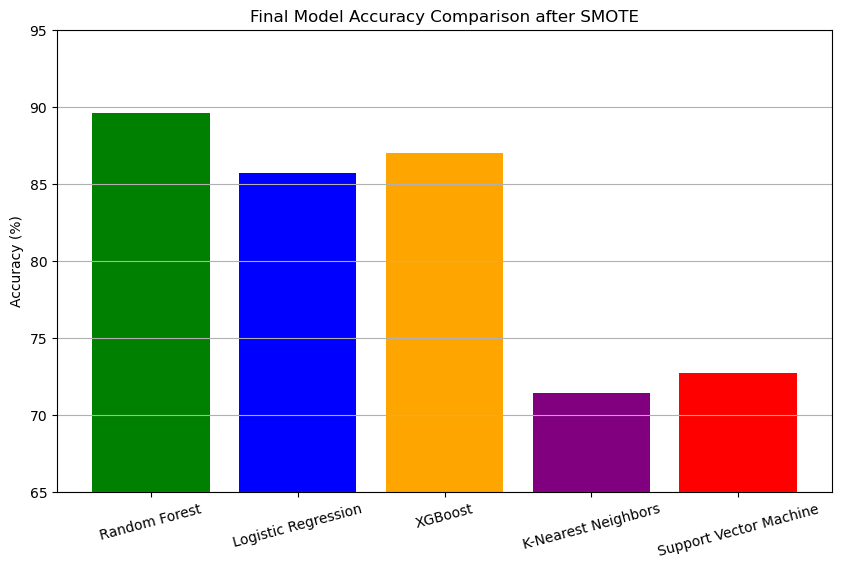

In [26]:
# Final Comparison Table including XGBoost
final_results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'Accuracy (%)': [89.61, 85.71, 87.01, 71.42, 72.72]
})


print(final_results)

# Plot Comparison Bar Graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(final_results['Model'], final_results['Accuracy (%)'], color=['green', 'blue', 'orange', 'purple', 'red'])
plt.title('Final Model Accuracy Comparison after SMOTE')
plt.ylabel('Accuracy (%)')
plt.ylim(65, 95)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

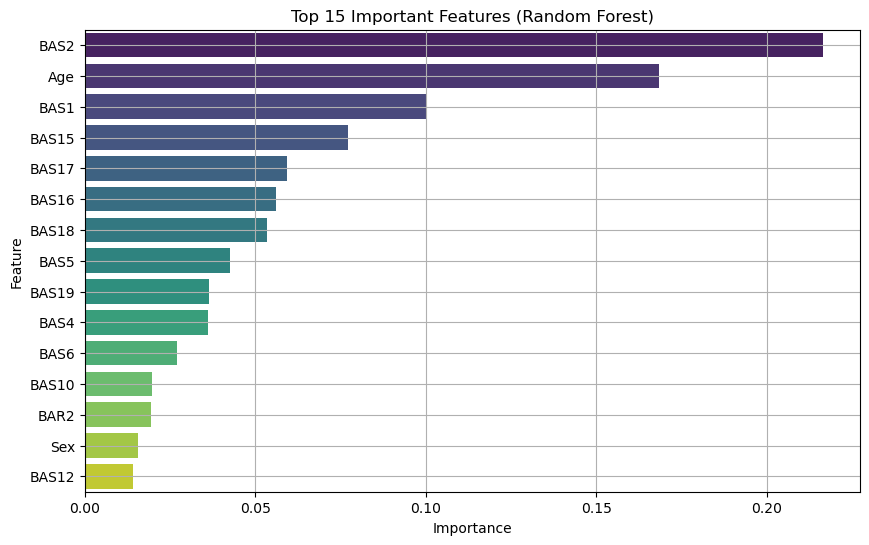

In [27]:
# Feature Importance - Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances = rf_smote.feature_importances_

rf_feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})

rf_feat_importance = rf_feat_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=rf_feat_importance.head(15), palette='viridis')
plt.title('Top 15 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


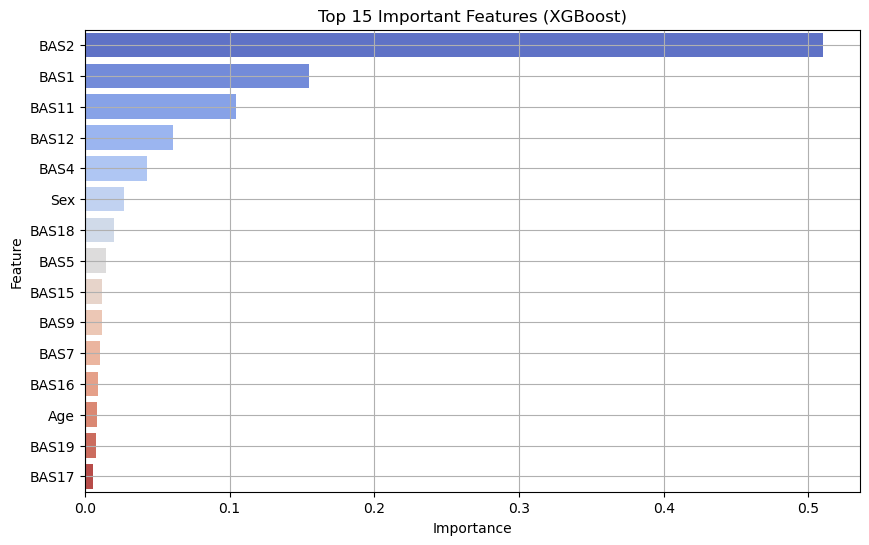

In [28]:
# Feature Importance - XGBoost
xgb_importances = xgb.feature_importances_

xgb_feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importances})

xgb_feat_importance = xgb_feat_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=xgb_feat_importance.head(15), palette='coolwarm')
plt.title('Top 15 Important Features (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model = Sequential()

# Input Layer + First Hidden Layer
model.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.3))

# Output Layer (3 classes -> softmax)
model.add(Dense(3, activation='softmax'))

#Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
# Train ANN 
history = model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,  
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
17/17 [==============================] - 0s 11ms/step - loss: 0.8055 - accuracy: 0.6965 - val_loss: 1.1762 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7560 - accuracy: 0.6834 - val_loss: 1.2354 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7072 - accuracy: 0.7225 - val_loss: 1.3454 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.7207 - val_loss: 1.3201 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.7430 - val_loss: 1.3718 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.7523 - val_loss: 1.3360 - val_accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6212 - accuracy: 0.7505 - val_loss: 1.3719 - val_accur

In [37]:
# Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"\nANN Test Accuracy: {test_accuracy*100:.2f}%")

3/3 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.8571

ANN Test Accuracy: 85.71%
